In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from keras.datasets import mnist

/home/aishee/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aishee/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aishee/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aishee/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 74s 6us/step


In [3]:
#Make a copy of training data
x_train_copy = x_train.copy()

In [4]:
#Flatten the training data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [5]:
#Make a copy of training classes
y_train_copy = y_train.copy()

In [6]:
#Convert class labels to categorical data to calculate cost
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
#Designing the model
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

import matplotlib.pyplot as plt

In [8]:
model = Sequential()
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))
model.add(Dropout(rate = 0.8))
model.add(Dense(256,activation='tanh'))
model.add(Dropout(rate = 0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
________________________________________________

In [30]:
#Training
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=50, validation_split=.1)
loss,accuracy=model.evaluate(x_test,y_test)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 80us/step - loss: 0.8866 - accuracy: 0.7089 - val_loss: 0.3435 - val_accuracy: 0.9165
Epoch 2/50
54000/54000 [==============================] - 4s 71us/step - loss: 0.8936 - accuracy: 0.7073 - val_loss: 0.3284 - val_accuracy: 0.9172
Epoch 3/50
54000/54000 [==============================] - 4s 73us/step - loss: 0.9011 - accuracy: 0.7028 - val_loss: 0.3278 - val_accuracy: 0.9197
Epoch 4/50
54000/54000 [==============================] - 4s 72us/step - loss: 0.8896 - accuracy: 0.7070 - val_loss: 0.3282 - val_accuracy: 0.9212
Epoch 5/50
54000/54000 [==============================] - 4s 81us/step - loss: 0.9081 - accuracy: 0.7040 - val_loss: 0.3284 - val_accuracy: 0.9158
Epoch 6/50
54000/54000 [==============================] - 4s 73us/step - loss: 0.9016 - accuracy: 0.7022 - val_loss: 0.3393 - val_accuracy: 0.9145
Epoch 7/50
54000/54000 [==============================] - 4s 73us/ste

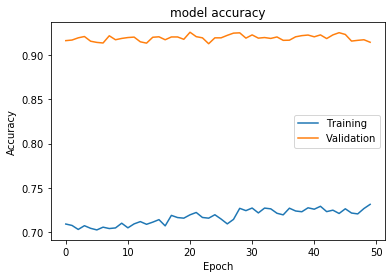

In [32]:
#Plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

In [33]:
# print(history.history.keys())

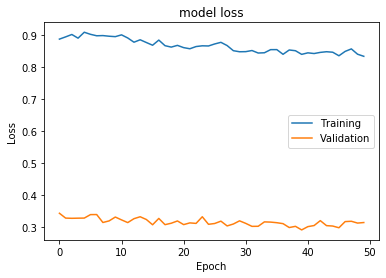

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

In [35]:
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.37
Test accuracy: 0.9


In [39]:
#Prepare custom dataset
import cv2
x_test_new=[]
n_data=10

for i in range(n_data):
    path=(str)(i)+".png"
    print(path)
    x=cv2.imread(path,0)
    x=~x
    x_test_new.append(x)

0.png
1.png
2.png
3.png
4.png
5.png
6.png
7.png
8.png
9.png


In [40]:
x_test_new=np.array(x_test_new)
x_test_new = x_test_new.reshape(x_test_new.shape[0], x_test_new.shape[1] * x_test_new.shape[2])

y_test_new=[]
for i in range(n_data):
    y_test_new.append(i)
    
y_test_new=np.array(y_test_new)
y_test_new=y_test_new.astype('uint8')

y_test_new = keras.utils.to_categorical(y_test_new, 10)

In [41]:
#Test on the new test set
loss2,accuracy2=model.evaluate(x_test_new,y_test_new)
print(accuracy2)

10/10 [==============================] - 0s 251us/step
0.5
